In [1]:
import numpy as np
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_auc_score,roc_curve,accuracy_score,f1_score, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, scale, StandardScaler,MinMaxScaler
import statsmodels.api as sm
from sklearn.feature_selection import RFE, RFECV
from sklearn.metrics import precision_score, recall_score, precision_recall_curve

D:\Development_Avecto\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("C:\\Users\\682146\\Desktop\\work\\Python JPA\\Assignments\\Leads.csv")

In [4]:
# Let's see the head of our master dataset
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
# Let's check the dimensions of the dataframe
df.shape

(9240, 37)

In [6]:
#drop prospect ID column as it is not required for my analysis
df = df.drop("Prospect ID",axis=1)

In [7]:
#replace "Select" with missing value and create a new dataframe
df1 = df.replace("Select",np.nan)

In [8]:
# let's look at the statistical aspects of the dataframe
df1.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [9]:
# Let's see the type of each column
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 36 columns):
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   5860 non-null object
How did you hear about X Education               1990 

In [10]:
df1.dtypes

Lead Number                                        int64
Lead Origin                                       object
Lead Source                                       object
Do Not Email                                      object
Do Not Call                                       object
Converted                                          int64
TotalVisits                                      float64
Total Time Spent on Website                        int64
Page Views Per Visit                             float64
Last Activity                                     object
Country                                           object
Specialization                                    object
How did you hear about X Education                object
What is your current occupation                   object
What matters most to you in choosing a course     object
Search                                            object
Magazine                                          object
Newspaper Article              

In [11]:
#check for missing values in percentage
miss = df1.isnull().sum()/len(df1)*100

In [12]:
print(miss)

Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.0000

In [13]:
#create a new dataframe which has missing values less than 30%
df_new = miss[miss.values<=30.0].index
df_final = df[df_new]

In [14]:
#Check the shape of new dataframe
df_final.shape

(9240, 26)

In [15]:
#Check for missing values again
df_final.isnull().sum()/len(df_final)*100

Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.000000
Newspaper Article                                 0.000000
X Education Forums                                0.0000

In [16]:
#Replace missing values for categorical column (above 25% missing values) with Mode value
df_final['Country'].fillna(df_final['Country'].mode()[0], inplace=True)
df_final['What is your current occupation'].fillna(df_final['What is your current occupation'].mode()[0], inplace=True)
df_final['What matters most to you in choosing a course'].fillna(df_final['What matters most to you in choosing a course'].mode()[0], inplace=True)

In [17]:
#Check for missing values again
df_final.isnull().sum()/len(df_final)*100

Lead Number                                      0.000000
Lead Origin                                      0.000000
Lead Source                                      0.389610
Do Not Email                                     0.000000
Do Not Call                                      0.000000
Converted                                        0.000000
TotalVisits                                      1.482684
Total Time Spent on Website                      0.000000
Page Views Per Visit                             1.482684
Last Activity                                    1.114719
Country                                          0.000000
What is your current occupation                  0.000000
What matters most to you in choosing a course    0.000000
Search                                           0.000000
Magazine                                         0.000000
Newspaper Article                                0.000000
X Education Forums                               0.000000
Newspaper     

In [18]:
#remove observations which has very less missing values
df_final = df_final.dropna()

In [19]:
#Shorten the column names which has bigger labels
df_final = df_final.rename(columns={'What is your current occupation': 'currentoccupation', 'What matters most to you in choosing a course': 'choosecourse','Receive More Updates About Our Courses': 'moreupdates','Update me on Supply Chain Content': 'supplychain','Get updates on DM Content': 'DMcontent','I agree to pay the amount through cheque': 'paycheque','A free copy of Mastering The Interview': 'masterinterview'})

In [20]:
#check for changes in column names
df_final.columns

Index(['Lead Number', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'currentoccupation', 'choosecourse', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations', 'moreupdates',
       'supplychain', 'DMcontent', 'paycheque', 'masterinterview',
       'Last Notable Activity'],
      dtype='object')

In [21]:
#check for datatypes
df_final.dtypes

Lead Number                      int64
Lead Origin                     object
Lead Source                     object
Do Not Email                    object
Do Not Call                     object
Converted                        int64
TotalVisits                    float64
Total Time Spent on Website      int64
Page Views Per Visit           float64
Last Activity                   object
Country                         object
currentoccupation               object
choosecourse                    object
Search                          object
Magazine                        object
Newspaper Article               object
X Education Forums              object
Newspaper                       object
Digital Advertisement           object
Through Recommendations         object
moreupdates                     object
supplychain                     object
DMcontent                       object
paycheque                       object
masterinterview                 object
Last Notable Activity    

In [22]:
#target variable to be converted to categorical data type
df_final["Converted"] = df_final["Converted"].astype('category')

In [23]:
#Separate dependent and independent variables
X = df_final.drop("Converted",axis=1)
y = df_final["Converted"]

In [24]:
#Separate numeric and category columns as two different dataframes for preprocessing
df_cat = X.select_dtypes(include=['object'])
df_num = X.select_dtypes(exclude=['object','category'])

In [25]:
#apply label encoder for categorical columns 
le = LabelEncoder()
df_cat = df_cat.apply(le.fit_transform)

In [26]:
#perform one hot encoding on categorical columns 
df_cat_dum = pd.get_dummies(df_cat.astype(str))

In [27]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
df_num.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,Lead Number,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000,9074.000000
mean,617032.619352,3.456028,482.887481,2.370151
std,23348.029512,4.858802,545.256560,2.160871
min,579533.000000,0.000000,0.000000,0.000000
25%,596406.000000,1.000000,11.000000,1.000000
50%,615278.500000,3.000000,246.000000,2.000000
75%,637176.500000,5.000000,922.750000,3.200000
90%,650276.800000,7.000000,1373.000000,5.000000
95%,655344.450000,10.000000,1557.000000,6.000000
99%,659563.350000,17.000000,1839.000000,9.000000


In [28]:
#Do scaling for numeric variables
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df_num)
scaled_features_df = pd.DataFrame(scaled_data, index=df_num.index, columns=df_num.columns)

In [29]:
#Concatenate dummy columns, numeric and the target (dependent variable) as a final dataframe
df_final1 = pd.concat([df_cat_dum,scaled_features_df,y],axis=1)

In [30]:
#All independent variables goes to X and dependent variable assigned to y
X = df_final1.drop("Converted",axis=1)
y = df_final1["Converted"]

In [31]:
#Split the data from training and testing purpose
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [32]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6246
Model Family:                Binomial   Df Model:                          104
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Fri, 01 Mar 2019   Deviance:                          nan
Time:                        05:19:11   Pearson chi2:                 7.07e+18
No. Iterations:                   100   Covariance Type:             nonrobust
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Lead Origin_0               -1.268e+15   2.14e+07  -5.92e+07      0.000   -1.27e+15   -1.27e+15
Lead Origin_1               -1.479e+15   2.14e+07   -6.9e+07      0.000   -1.48e+15   -1.48e+15
Lead Origin_2               -1.124e+15   3.99e+07  -2.81e+07      0.000   -1.12e+15   -1.12e+15
Lead Origin_3                3.936e+15   5.58e+07   7.06e+07      0.000    3.94e+15    3.94e+15
Lead Source_0                1.526e+13   5.41e+07   2.82e+05      0.000    1.53e+13    1.53e+13
Lead Source_1                2.084e+14   1.46e+07   1.43e+07      0.000    2.08e+14    2.08e+14
Lead Source_10               8.805e+14   3.99e+07   2.21e+07      0.000     8.8e+14     8.8e+14
Lead Source_11               6.083e+14   1.61e+07   3.77e+07      0.000    6.08e+14    6.08e+14
Lead Source_12               7.994e+14   4.74e+07   1.69e+07      0.000    7.99e+14    7.99e+14
Lead Source_13                 30.1724   1.21e-06   2.49e+07      0.000      30.172      30.172
Lead Source_14               1.432e+15   4.02e+07   3.56e+07      0.000    1.43e+15    1.43e+15
Lead Source_15              -2.038e+14   3.95e+07  -5.16e+06      0.000   -2.04e+14   -2.04e+14
Lead Source_16              -3.529e+15   6.53e+07   -5.4e+07      0.000   -3.53e+15   -3.53e+15
Lead Source_17              -4.399e+15   3.52e+07  -1.25e+08      0.000    -4.4e+15    -4.4e+15
Lead Source_18              -5.166e+14   6.55e+07  -7.89e+06      0.000   -5.17e+14   -5.17e+14
Lead Source_19               4.454e+14   6.53e+07   6.82e+06      0.000    4.45e+14    4.45e+14
Lead Source_2               -4.529e+15   6.87e+07  -6.59e+07      0.000   -4.53e+15   -4.53e+15
Lead Source_20              -4.838e+14    7.6e+07  -6.37e+06      0.000   -4.84e+14   -4.84e+14
Lead Source_3                1.531e+14   1.45e+07   1.06e+07      0.000    1.53e+14    1.53e+14
Lead Source_4                6.096e+15      6e+07   1.02e+08      0.000     6.1e+15     6.1e+15
Lead Source_5                6.748e+15   6.54e+07   1.03e+08      0.000    6.75e+15    6.75e+15
Lead Source_6                1.147e+15   1.46e+07   7.85e+07      0.000    1.15e+15    1.15e+15
Lead Source_7                1.264e+14   1.46e+07   8.63e+06      0.000    1.26e+14    1.26e+14
Lead Source_8               -2.784e+15   6.53e+07  -4.26e+07      0.000   -2.78e+15   -2.78e+15
Lead Source_9               -2.149e+15   6.58e+07  -3.27e+07      0.000   -2.15e+15   -2.15e+15
Do Not Email_0               4.262e+14   3.83e+06   1.11e+08      0.000    4.26e+14    4.26e+14
Do Not Email_1              -3.606e+14   3.92e+06   -9.2e+07      0.000   -3.61e+14   -3.61e+14
Do Not Call_0               -3.146e+15   2.29e+07  -1.38e+08      0.000   -3.15e+15   -3.15e+15
Do Not Call_1                3.212e+15   2.51e+07   1.28e+08      0.000    3.21e+15    3.21e+15
Last Activity_0              4.542e+15   3.22e+07   1.41e+08      0.000    4.54e+15    4.5

In [33]:
logreg = LogisticRegression()

In [34]:
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [35]:
# Create recursive feature eliminator that scores features by mean squared errors
rfecv = RFECV(estimator=logreg, step=1)

In [36]:
# Fit recursive feature eliminator 
rfecv.fit(X, y)

# Recursive feature elimination
rfecv.transform(X)

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.        , 0.        , ..., 0.01992032, 0.29665493,
        0.04545455],
       [0.        , 1.        , 0.        , ..., 0.00796813, 0.67429577,
        0.03636364],
       ...,
       [0.        , 1.        , 0.        , ..., 0.00796813, 0.08758803,
        0.03636364],
       [0.        , 1.        , 0.        , ..., 0.01195219, 0.21963028,
        0.05454545],
       [0.        , 1.        , 0.        , ..., 0.02390438, 0.56294014,
        0.05454545]])

In [37]:
# Number of best features
rfecv.n_features_

33

In [38]:
rfe = RFE(logreg, 33)             # running RFE with 13 variables as output
rfe = rfe.fit(X_train, y_train)

In [39]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Lead Origin_0', True, 1),
 ('Lead Origin_1', True, 1),
 ('Lead Origin_2', True, 1),
 ('Lead Origin_3', False, 58),
 ('Lead Source_0', False, 48),
 ('Lead Source_1', False, 40),
 ('Lead Source_10', True, 1),
 ('Lead Source_11', False, 6),
 ('Lead Source_12', True, 1),
 ('Lead Source_13', False, 97),
 ('Lead Source_14', True, 1),
 ('Lead Source_15', False, 92),
 ('Lead Source_16', False, 34),
 ('Lead Source_17', True, 1),
 ('Lead Source_18', False, 53),
 ('Lead Source_19', False, 44),
 ('Lead Source_2', False, 43),
 ('Lead Source_20', False, 57),
 ('Lead Source_3', False, 42),
 ('Lead Source_4', False, 60),
 ('Lead Source_5', False, 7),
 ('Lead Source_6', True, 1),
 ('Lead Source_7', False, 41),
 ('Lead Source_8', False, 49),
 ('Lead Source_9', False, 61),
 ('Do Not Email_0', True, 1),
 ('Do Not Email_1', True, 1),
 ('Do Not Call_0', False, 4),
 ('Do Not Call_1', False, 13),
 ('Last Activity_0', True, 1),
 ('Last Activity_1', True, 1),
 ('Last Activity_10', False, 35),
 ('Last Activit

In [40]:
col = X_train.columns[rfe.support_]

In [41]:
X_train.columns[~rfe.support_]

Index(['Lead Origin_3', 'Lead Source_0', 'Lead Source_1', 'Lead Source_11',
       'Lead Source_13', 'Lead Source_15', 'Lead Source_16', 'Lead Source_18',
       'Lead Source_19', 'Lead Source_2', 'Lead Source_20', 'Lead Source_3',
       'Lead Source_4', 'Lead Source_5', 'Lead Source_7', 'Lead Source_8',
       'Lead Source_9', 'Do Not Call_0', 'Do Not Call_1', 'Last Activity_10',
       'Last Activity_11', 'Last Activity_12', 'Last Activity_13',
       'Last Activity_14', 'Last Activity_15', 'Last Activity_16',
       'Last Activity_3', 'Last Activity_4', 'Last Activity_5',
       'Last Activity_6', 'Last Activity_7', 'Country_0', 'Country_1',
       'Country_10', 'Country_11', 'Country_12', 'Country_13', 'Country_15',
       'Country_17', 'Country_18', 'Country_19', 'Country_2', 'Country_21',
       'Country_22', 'Country_23', 'Country_24', 'Country_25', 'Country_26',
       'Country_27', 'Country_28', 'Country_29', 'Country_3', 'Country_30',
       'Country_31', 'Country_32', 'Coun

In [42]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6318
Model Family:                Binomial   Df Model:                           32
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Fri, 01 Mar 2019   Deviance:                          nan
Time:                        05:19:59   Pearson chi2:                 7.38e+18
No. Iterations:                   100   Covariance Type:             nonrobust
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                        2.566e+14   1.47e+07   1.75e+07      0.000    2.57e+14    2.57e+14
Lead Origin_0                3.591e+14    1.4e+07   2.57e+07      0.000    3.59e+14    3.59e+14
Lead Origin_1                1.793e+14    1.4e+07   1.28e+07      0.000    1.79e+14    1.79e+14
Lead Origin_2                1.132e+15   2.89e+07   3.92e+07      0.000    1.13e+15    1.13e+15
Lead Source_10               -4.48e+13   2.57e+07  -1.74e+06      0.000   -4.48e+13   -4.48e+13
Lead Source_12               1.685e+14   4.75e+07   3.55e+06      0.000    1.68e+14    1.68e+14
Lead Source_14               1.351e+15   2.63e+07   5.14e+07      0.000    1.35e+15    1.35e+15
Lead Source_17              -2.476e+15   3.36e+07  -7.36e+07      0.000   -2.48e+15   -2.48e+15
Lead Source_6                8.644e+14   3.31e+06   2.61e+08      0.000    8.64e+14    8.64e+14
Do Not Email_0               5.993e+14   7.47e+06   8.02e+07      0.000    5.99e+14    5.99e+14
Do Not Email_1              -3.427e+14   7.75e+06  -4.42e+07      0.000   -3.43e+14   -3.43e+14
Last Activity_0               4.56e+15   3.01e+07   1.52e+08      0.000    4.56e+15    4.56e+15
Last Activity_1             -6.917e+14   4.51e+06  -1.53e+08      0.000   -6.92e+14   -6.92e+14
Last Activity_2             -2.861e+14   6.04e+06  -4.73e+07      0.000   -2.86e+14   -2.86e+14
Last Activity_8              1.385e+15   3.01e+07    4.6e+07      0.000    1.39e+15    1.39e+15
Last Activity_9             -6.677e+14    3.7e+06  -1.81e+08      0.000   -6.68e+14   -6.68e+14
Country_14                  -5.272e+15   4.75e+07  -1.11e+08      0.000   -5.27e+15   -5.27e+15
Country_16                  -4.147e+15   4.75e+07  -8.73e+07      0.000   -4.15e+15   -4.15e+15
Country_20                  -2.255e+15   4.75e+07  -4.75e+07      0.000   -2.26e+15   -2.26e+15
currentoccupation_1          3.917e+15   3.05e+07   1.28e+08      0.000    3.92e+15    3.92e+15
currentoccupation_3         -8.858e+14   1.78e+07  -4.99e+07      0.000   -8.86e+14   -8.86e+14
currentoccupation_4          -8.18e+14   1.68e+07  -4.86e+07      0.000   -8.18e+14   -8.18e+14
currentoccupation_5          4.656e+14   1.71e+07   2.72e+07      0.000    4.66e+14    4.66e+14
Newspaper_1                  -4.41e+15   6.72e+07  -6.57e+07      0.000   -4.41e+15   -4.41e+15
Last Notable Activity_10     -1.21e+15   5.01e+06  -2.42e+08      0.000   -1.21e+15   -1.21e+15
Last Notable Activity_2     -1.321e+15   6.48e+06  -2.04e+08      0.000   -1.32e+15   -1.32e+15
Last Notable Activity_4     -1.018e+15   2.34e+06  -4.36e+08      0.000   -1.02e+15   -1.02e+15
Last Notable Activity_7     -9.668e+13   3.58e+07   -2.7e+06      0.000   -9.67e+13   -9.67e+13
Last Notable Activity_8     -1.163e+15   2.52e+06  -4.61e+08      0.000   -1.16e+15   -1.16e+15
Last Notable Activity_9     -1.162e+15   7.18e+06  -1.62e+08      0.000   -1.16e+15   -1.1

In [43]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3009    0.0
1012    1.0
9226    1.0
4750    1.0
7987    0.0
1281    1.0
2880    0.0
4971    1.0
7536    0.0
1248    0.0
dtype: float64

In [44]:
y_train_pred_final = pd.DataFrame({'Lead_Scoring':y_train.values, 'LS_Prob':y_train_pred})
#y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

,Lead_Scoring,LS_Prob
3009,0,0.0
1012,0,1.0
9226,0,1.0
4750,1,1.0
7987,1,0.0


In [45]:
y_train_pred_final['predicted'] = y_train_pred_final.LS_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Lead_Scoring,LS_Prob,predicted
3009,0,0.0,0
1012,0,1.0,1
9226,0,1.0,1
4750,1,1.0,1
7987,1,0.0,0


In [46]:
# Confusion matrix 
confusion = confusion_matrix(y_train_pred_final.Lead_Scoring, y_train_pred_final.predicted )
print(confusion)

[[3022  883]
 [ 755 1691]]


In [47]:
# Let's check the overall accuracy.
print(accuracy_score(y_train_pred_final.Lead_Scoring, y_train_pred_final.predicted))

0.7420878601794992


In [48]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [49]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,Do Not Email_0,625.28
2,Lead Origin_2,75.21
1,Lead Origin_1,68.39
0,Lead Origin_0,65.76
9,Do Not Email_1,54.99
3,Lead Source_10,45.66
20,currentoccupation_4,36.56
21,currentoccupation_5,28.96
5,Lead Source_14,15.24
19,currentoccupation_3,9.65


In [50]:
col = col.drop('Do Not Email_0', 1)
col

Index(['Lead Origin_0', 'Lead Origin_1', 'Lead Origin_2', 'Lead Source_10',
       'Lead Source_12', 'Lead Source_14', 'Lead Source_17', 'Lead Source_6',
       'Do Not Email_1', 'Last Activity_0', 'Last Activity_1',
       'Last Activity_2', 'Last Activity_8', 'Last Activity_9', 'Country_14',
       'Country_16', 'Country_20', 'currentoccupation_1',
       'currentoccupation_3', 'currentoccupation_4', 'currentoccupation_5',
       'Newspaper_1', 'Last Notable Activity_10', 'Last Notable Activity_2',
       'Last Notable Activity_4', 'Last Notable Activity_7',
       'Last Notable Activity_8', 'Last Notable Activity_9', 'Lead Number',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit'],
      dtype='object')

In [51]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6318
Model Family:                Binomial   Df Model:                           32
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2577.3
Date:                Fri, 01 Mar 2019   Deviance:                       5154.7
Time:                        05:20:01   Pearson chi2:                 6.31e+03
No. Iterations:                    22   Covariance Type:             nonrobust
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           1.4433      0.769      1.878      0.060      -0.063       2.950
Lead Origin_0                  -1.1464      0.467     -2.452      0.014      -2.063      -0.230
Lead Origin_1                  -1.3733      0.467     -2.943      0.003      -2.288      -0.459
Lead Origin_2                   0.8186      1.039      0.788      0.431      -1.218       2.855
Lead Source_10                  1.7900      0.960      1.864      0.062      -0.092       3.672
Lead Source_12                  2.1786      1.461      1.491      0.136      -0.685       5.043
Lead Source_14                  3.8546      1.182      3.261      0.001       1.538       6.171
Lead Source_17                -22.4382   3.47e+04     -0.001      0.999    -6.8e+04    6.79e+04
Lead Source_6                   1.1099      0.135      8.202      0.000       0.845       1.375
Do Not Email_1                 -1.5935      0.204     -7.794      0.000      -1.994      -1.193
Last Activity_0                24.0123      3e+04      0.001      0.999   -5.89e+04    5.89e+04
Last Activity_1                -1.1242      0.234     -4.804      0.000      -1.583      -0.666
Last Activity_2                -1.3421      0.432     -3.105      0.002      -2.189      -0.495
Last Activity_8                 1.3618      1.181      1.153      0.249      -0.953       3.677
Last Activity_9                -1.3988      0.194     -7.227      0.000      -1.778      -1.019
Country_14                    -25.0372   4.65e+04     -0.001      1.000   -9.12e+04    9.12e+04
Country_16                    -23.5675   4.59e+04     -0.001      1.000   -9.01e+04       9e+04
Country_20                    -23.6998   5.32e+04     -0.000      1.000   -1.04e+05    1.04e+05
currentoccupation_1            22.8507   2.58e+04      0.001      0.999   -5.04e+04    5.05e+04
currentoccupation_3            -0.7070      0.649     -1.089      0.276      -1.980       0.566
currentoccupation_4            -1.2033      0.610     -1.974      0.048      -2.398      -0.009
currentoccupation_5             1.6082      0.636      2.527      0.011       0.361       2.856
Newspaper_1                   -25.3169   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Last Notable Activity_10       -2.0758      0.216     -9.631      0.000      -2.498      -1.653
Last Notable Activity_2        -2.0447      0.259     -7.883      0.000      -2.553      -1.536
Last Notable Activity_4        -1.5492      0.092    -16.930      0.000      -1.729      -1.370
Last Notable Activity_7         0.5008      1.616      0.310      0.757      -2.666       3.668
Last Notable Activity_8        -1.8978      0.104    -18.216      0.000      -2.102      -1.694
Last Notable Activity_9        -1.6287      0.375     -4.340      0.000      -2.364      -0.893
Lead Number                     0.7244      0.128      5.644      0.000       0.473       

In [52]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [53]:
y_train_pred[:10]

array([0.19297051, 0.43098123, 0.15544487, 0.88512107, 0.60621427,
       0.8279417 , 0.09350034, 0.91987106, 0.8156821 , 0.66375325])

In [54]:
y_train_pred_final['LS_Prob'] = y_train_pred

In [55]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.LS_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Lead_Scoring,LS_Prob,predicted
3009,0,0.192971,0
1012,0,0.430981,0
9226,0,0.155445,0
4750,1,0.885121,1
7987,1,0.606214,1


In [56]:
# Let's check the overall accuracy. (Overall accuracy hasn't changed)
print(accuracy_score(y_train_pred_final.Lead_Scoring, y_train_pred_final.predicted))

0.8162494095418045


In [57]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
19,currentoccupation_4,146.98
1,Lead Origin_1,90.70
2,Lead Origin_2,73.52
0,Lead Origin_0,66.26
3,Lead Source_10,48.14
5,Lead Source_14,15.48
20,currentoccupation_5,13.33
18,currentoccupation_3,4.65
31,Page Views Per Visit,4.57
28,Lead Number,3.88


In [58]:
# Let's drop TotalCharges since it has a high VIF
#col = col.drop(['currentoccupation_4','Lead Origin_1','Lead Origin_2','Lead Origin_0','Lead Source_10','Lead Source_14','currentoccupation_5'])
col = col.drop(['currentoccupation_4'])
col

Index(['Lead Origin_0', 'Lead Origin_1', 'Lead Origin_2', 'Lead Source_10',
       'Lead Source_12', 'Lead Source_14', 'Lead Source_17', 'Lead Source_6',
       'Do Not Email_1', 'Last Activity_0', 'Last Activity_1',
       'Last Activity_2', 'Last Activity_8', 'Last Activity_9', 'Country_14',
       'Country_16', 'Country_20', 'currentoccupation_1',
       'currentoccupation_3', 'currentoccupation_5', 'Newspaper_1',
       'Last Notable Activity_10', 'Last Notable Activity_2',
       'Last Notable Activity_4', 'Last Notable Activity_7',
       'Last Notable Activity_8', 'Last Notable Activity_9', 'Lead Number',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit'],
      dtype='object')

In [59]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6319
Model Family:                Binomial   Df Model:                           31
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2579.3
Date:                Fri, 01 Mar 2019   Deviance:                       5158.6
Time:                        05:20:03   Pearson chi2:                 6.31e+03
No. Iterations:                    22   Covariance Type:             nonrobust
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           0.2390      0.468      0.510      0.610      -0.679       1.157
Lead Origin_0                  -1.1447      0.467     -2.449      0.014      -2.061      -0.229
Lead Origin_1                  -1.3775      0.466     -2.953      0.003      -2.292      -0.463
Lead Origin_2                   0.8179      1.039      0.787      0.431      -1.218       2.854
Lead Source_10                  1.7944      0.960      1.869      0.062      -0.087       3.676
Lead Source_12                  2.1699      1.462      1.485      0.138      -0.695       5.034
Lead Source_14                  3.8529      1.182      3.261      0.001       1.537       6.169
Lead Source_17                -22.4453   3.47e+04     -0.001      0.999    -6.8e+04    6.79e+04
Lead Source_6                   1.1084      0.135      8.196      0.000       0.843       1.374
Do Not Email_1                 -1.5862      0.204     -7.763      0.000      -1.987      -1.186
Last Activity_0                24.0053      3e+04      0.001      0.999   -5.89e+04    5.89e+04
Last Activity_1                -1.1304      0.234     -4.832      0.000      -1.589      -0.672
Last Activity_2                -1.3502      0.432     -3.125      0.002      -2.197      -0.503
Last Activity_8                 1.3514      1.181      1.144      0.253      -0.964       3.667
Last Activity_9                -1.3979      0.193     -7.232      0.000      -1.777      -1.019
Country_14                    -25.0379   4.65e+04     -0.001      1.000   -9.12e+04    9.12e+04
Country_16                    -23.5679   4.59e+04     -0.001      1.000      -9e+04       9e+04
Country_20                    -23.7015   5.32e+04     -0.000      1.000   -1.04e+05    1.04e+05
currentoccupation_1            24.0507   2.57e+04      0.001      0.999   -5.04e+04    5.05e+04
currentoccupation_3             0.4920      0.230      2.142      0.032       0.042       0.942
currentoccupation_5             2.8070      0.191     14.693      0.000       2.433       3.181
Newspaper_1                   -25.3264   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Last Notable Activity_10       -2.0713      0.216     -9.606      0.000      -2.494      -1.649
Last Notable Activity_2        -2.0435      0.259     -7.879      0.000      -2.552      -1.535
Last Notable Activity_4        -1.5440      0.091    -16.885      0.000      -1.723      -1.365
Last Notable Activity_7         0.5119      1.616      0.317      0.751      -2.655       3.679
Last Notable Activity_8        -1.8892      0.104    -18.156      0.000      -2.093      -1.685
Last Notable Activity_9        -1.6295      0.375     -4.342      0.000      -2.365      -0.894
Lead Number                     0.7183      0.128      5.601      0.000       0.467       0.970
TotalVisits                     9.8650      2.609      3.780      0.000       4.751      1

In [60]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [61]:
y_train_pred[:10]

array([0.1929327 , 0.42785687, 0.15647302, 0.8849515 , 0.60897434,
       0.82738984, 0.09349507, 0.92068806, 0.81727347, 0.66483415])

In [62]:
y_train_pred_final['LS_Prob'] = y_train_pred

In [63]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.LS_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Lead_Scoring,LS_Prob,predicted
3009,0,0.192933,0
1012,0,0.427857,0
9226,0,0.156473,0
4750,1,0.884951,1
7987,1,0.608974,1


In [64]:
# Let's check the overall accuracy. (there is no change in the accuracy)
print(accuracy_score(y_train_pred_final.Lead_Scoring, y_train_pred_final.predicted))

0.8167217760982523


In [65]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_2,62.99
3,Lead Source_10,48.14
5,Lead Source_14,15.48
1,Lead Origin_1,7.30
0,Lead Origin_0,6.33
30,Page Views Per Visit,4.57
27,Lead Number,3.81
12,Last Activity_8,3.42
24,Last Notable Activity_7,3.42
25,Last Notable Activity_8,3.20


In [66]:
# Let's drop TotalCharges since it has a high VIF
col = col.drop(['Lead Origin_2'])
col

Index(['Lead Origin_0', 'Lead Origin_1', 'Lead Source_10', 'Lead Source_12',
       'Lead Source_14', 'Lead Source_17', 'Lead Source_6', 'Do Not Email_1',
       'Last Activity_0', 'Last Activity_1', 'Last Activity_2',
       'Last Activity_8', 'Last Activity_9', 'Country_14', 'Country_16',
       'Country_20', 'currentoccupation_1', 'currentoccupation_3',
       'currentoccupation_5', 'Newspaper_1', 'Last Notable Activity_10',
       'Last Notable Activity_2', 'Last Notable Activity_4',
       'Last Notable Activity_7', 'Last Notable Activity_8',
       'Last Notable Activity_9', 'Lead Number', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit'],
      dtype='object')

In [132]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()
res.params

const                           0.404248
Lead Origin_0                  -1.310132
Lead Origin_1                  -1.542475
Lead Source_10                  2.449472
Lead Source_12                  2.170702
Lead Source_14                  4.507761
Lead Source_17                -22.444224
Lead Source_6                   1.111502
Do Not Email_1                 -1.587314
Last Activity_0                24.003964
Last Activity_1                -1.129644
Last Activity_2                -1.349460
Last Activity_8                 1.353335
Last Activity_9                -1.398144
Country_14                    -25.039326
Country_16                    -23.566277
Country_20                    -23.702638
currentoccupation_1            24.051650
currentoccupation_3             0.492054
currentoccupation_5             2.806149
Newspaper_1                   -25.326273
Last Notable Activity_10       -2.066470
Last Notable Activity_2        -2.044225
Last Notable Activity_4        -1.545570
Last Notable Act

In [68]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [69]:
y_train_pred[:10]

array([0.1926172 , 0.42722343, 0.15676068, 0.88509067, 0.60938267,
       0.82734289, 0.09329592, 0.92085213, 0.81756829, 0.66475638])

In [70]:
y_train_pred_final['LS_Prob'] = y_train_pred

In [71]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.LS_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Lead_Scoring,LS_Prob,predicted
3009,0,0.192617,0
1012,0,0.427223,0
9226,0,0.156761,0
4750,1,0.885091,1
7987,1,0.609383,1


In [72]:
# Let's check the overall accuracy. (there is no change in the accuracy)
print(accuracy_score(y_train_pred_final.Lead_Scoring, y_train_pred_final.predicted))

0.8168792316170682


In [73]:
#Lets check the VIF again (All values are good and we can proceed)
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Origin_1,7.25
0,Lead Origin_0,6.28
29,Page Views Per Visit,4.57
26,Lead Number,3.80
11,Last Activity_8,3.42
23,Last Notable Activity_7,3.42
24,Last Notable Activity_8,3.20
6,Lead Source_6,2.87
28,Total Time Spent on Website,2.37
22,Last Notable Activity_4,2.31


In [74]:
# Let's take a look at the confusion matrix again 
confusion = confusion_matrix(y_train_pred_final.Lead_Scoring, y_train_pred_final.predicted )
confusion

array([[3464,  441],
       [ 722, 1724]], dtype=int64)

In [75]:
# Let's check the overall accuracy.
accuracy_score(y_train_pred_final.Lead_Scoring, y_train_pred_final.predicted)

0.8168792316170682

In [76]:
#Metrics apart from accuracy
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [77]:
#  sensitivity of our logistic regression model
TP / float(TP+FN)

0.7048242027800491

In [78]:
# Let us calculate specificity
TN / float(TN+FP)

0.887067861715749

In [79]:
# Calculate false postive rate 
print(FP/ float(TN+FP))

0.11293213828425096


In [80]:
# positive predictive value 
print (TP / float(TP+FP))

0.7963048498845265


In [81]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8275203057811753


In [82]:
#Plot ROC curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [83]:
fpr, tpr, thresholds = roc_curve( y_train_pred_final.Lead_Scoring, y_train_pred_final.LS_Prob, drop_intermediate = False )

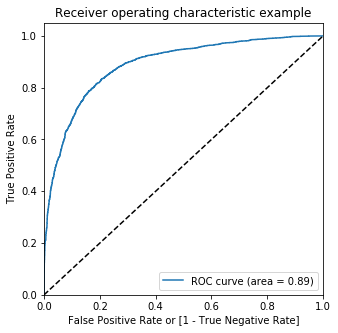

In [84]:
draw_roc(y_train_pred_final.Lead_Scoring, y_train_pred_final.LS_Prob)

In [85]:
#Find optimal cut off point
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.LS_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Lead_Scoring,LS_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
3009,0,0.192617,0,1,1,0,0,0,0,0,0,0,0
1012,0,0.427223,0,1,1,1,1,1,0,0,0,0,0
9226,0,0.156761,0,1,1,0,0,0,0,0,0,0,0
4750,1,0.885091,1,1,1,1,1,1,1,1,1,1,0
7987,1,0.609383,1,1,1,1,1,1,1,1,0,0,0


In [86]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = confusion_matrix(y_train_pred_final.Lead_Scoring, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.612502  0.964841  0.391805
0.2   0.2  0.749016  0.919460  0.642254
0.3   0.3  0.803496  0.845462  0.777209
0.4   0.4  0.819713  0.775552  0.847375
0.5   0.5  0.816879  0.704824  0.887068
0.6   0.6  0.809479  0.628373  0.922919
0.7   0.7  0.785546  0.524121  0.949296
0.8   0.8  0.764132  0.434587  0.970551
0.9   0.9  0.721619  0.295176  0.988732


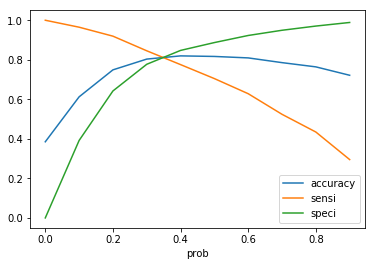

In [87]:
# Let's plot accuracy sensitivity and specificity for various probabilities. (0.3 is the optimum cut off point)
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [88]:
y_train_pred_final['final_predicted'] = y_train_pred_final.LS_Prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Lead_Scoring,LS_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
3009,0,0.192617,0,1,1,0,0,0,0,0,0,0,0,0
1012,0,0.427223,0,1,1,1,1,1,0,0,0,0,0,1
9226,0,0.156761,0,1,1,0,0,0,0,0,0,0,0,0
4750,1,0.885091,1,1,1,1,1,1,1,1,1,1,0,1
7987,1,0.609383,1,1,1,1,1,1,1,1,0,0,0,1


In [89]:
# Let's check the overall accuracy.
accuracy_score(y_train_pred_final.Lead_Scoring, y_train_pred_final.final_predicted)

0.8034955125177138

In [90]:
confusion2 = confusion_matrix(y_train_pred_final.Lead_Scoring, y_train_pred_final.final_predicted )
confusion2

array([[3035,  870],
       [ 378, 2068]], dtype=int64)

In [91]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [92]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8454619787408013

In [93]:
# Let us calculate specificity
TN / float(TN+FP)

0.7772087067861716

In [94]:
# Calculate false postive rate 
print(FP/ float(TN+FP))

0.22279129321382843


In [95]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7038801906058543


In [96]:
# Negative predictive value
print (TN / float(TN+ FN))

0.889246996777029


In [97]:
#looking at the confusion matrix again
confusion = confusion_matrix(y_train_pred_final.Lead_Scoring, y_train_pred_final.predicted )
confusion

array([[3464,  441],
       [ 722, 1724]], dtype=int64)

In [98]:
#Precision
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7963048498845265

In [99]:
#recall
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.7048242027800491

In [100]:
#Precision score
precision_score(y_train_pred_final.Lead_Scoring, y_train_pred_final.predicted)

0.7963048498845265

In [101]:
#recall score
recall_score(y_train_pred_final.Lead_Scoring, y_train_pred_final.predicted)

0.7048242027800491

In [102]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Lead_Scoring, y_train_pred_final.LS_Prob)

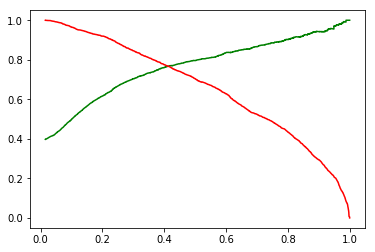

In [103]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [104]:
#Prediction on test set
X_test = X_test[col]
X_test.head()

,Lead Origin_0,Lead Origin_1,Lead Source_10,Lead Source_12,Lead Source_14,Lead Source_17,Lead Source_6,Do Not Email_1,Last Activity_0,Last Activity_1,...,Last Notable Activity_10,Last Notable Activity_2,Last Notable Activity_4,Last Notable Activity_7,Last Notable Activity_8,Last Notable Activity_9,Lead Number,TotalVisits,Total Time Spent on Website,Page Views Per Visit
3271,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0.604884,0.015936,0.069102,0.072727
1490,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0.800047,0.019920,0.665933,0.090909
7936,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0.115782,0.007968,0.032570,0.036364
4216,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0.491404,0.000000,0.000000,0.000000
3830,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0.539973,0.031873,0.072183,0.145455


In [105]:
X_test_sm = sm.add_constant(X_test)

In [106]:
y_test_pred = res.predict(X_test_sm)

In [107]:
y_test_pred[:10]

3271    0.145685
1490    0.977868
7936    0.095072
4216    0.859056
3830    0.107676
1800    0.708755
6507    0.321444
4821    0.272296
4223    0.961020
4714    0.201760
dtype: float64

In [108]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [109]:
# Let's see the head
y_pred_1.head()

,0
3271,0.145685
1490,0.977868
7936,0.095072
4216,0.859056
3830,0.107676


In [110]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [111]:
# Putting CustID to index
y_test_df['ID'] = y_test_df.index

In [112]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [113]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [114]:
y_pred_final.head()

,Converted,ID,0
0,0,3271,0.145685
1,1,1490,0.977868
2,0,7936,0.095072
3,1,4216,0.859056
4,0,3830,0.107676


In [115]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'LS_Prob'})

In [116]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex_axis(['ID','Converted','LS_Prob'], axis=1)

In [117]:
# Let's see the head of y_pred_final
y_pred_final.head()

,ID,Converted,LS_Prob
0,3271,0,0.145685
1,1490,1,0.977868
2,7936,0,0.095072
3,4216,1,0.859056
4,3830,0,0.107676


In [118]:
y_pred_final['final_predicted'] = y_pred_final.LS_Prob.map(lambda x: 1 if x > 0.4 else 0)

In [119]:
# Let's check the overall accuracy.
accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8174807197943444

In [120]:
confusion2 = confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1466,  268],
       [ 229,  760]], dtype=int64)

In [121]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [122]:
# Let's see the sensitivity 
TP / float(TP+FN)

0.7684529828109201

In [123]:
# calculate specificity
TN / float(TN+FP)

0.845444059976932

In [124]:
#1 Lead Origin, Lead Source and Do not email

In [125]:
#2 API, Landing page submission and Lead Add Form (lead origin variable)

In [139]:
df_cat[df_cat["Lead Source"] == 10]

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Last Activity,Country,currentoccupation,choosecourse,Search,Magazine,...,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,moreupdates,supplychain,DMcontent,paycheque,masterinterview,Last Notable Activity
112,2,10,0,0,3,12,5,0,0,0,...,0,0,0,0,0,0,0,0,0,2
130,2,10,0,0,5,12,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8
137,2,10,0,0,5,12,4,0,0,0,...,0,0,0,0,0,0,0,0,0,8
174,2,10,0,0,5,12,5,0,0,0,...,0,0,0,0,0,0,0,0,0,4
178,2,10,0,0,5,12,5,0,0,0,...,0,0,0,0,0,0,0,0,0,4
187,2,10,0,0,13,12,4,0,0,0,...,0,0,0,0,0,0,0,0,0,8
205,2,10,0,0,5,12,4,0,0,0,...,0,0,0,0,0,0,0,0,0,4
213,2,10,0,0,5,12,4,0,0,0,...,0,0,0,0,0,0,0,0,0,4
220,2,10,0,0,5,12,5,0,0,0,...,0,0,0,0,0,0,0,0,0,8
270,2,10,0,0,5,12,5,0,0,0,...,0,0,0,0,0,0,0,0,0,4
